In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [2]:
warnings.filterwarnings('ignore')

In [3]:
pd.pandas.set_option("display.max_columns",None)
df=pd.read_csv(r"./data/clustered_data.csv")
print(df.shape)

(2240, 22)


### Why do we split our data?
Training Dataset is the part of Original Dataset that we use to train our ML model. The model learns on this data by running the algorithm and maps a function F(x) where “x” in the independent variable (inputs) for “y” where “y” is the dependent variable(output).

In [4]:
X=df.drop("cluster",axis=1) #dropping the target columns which is 'cluster'
y=df['cluster']

### Grid Search
Why do we use Grid Search?

GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters. It is basically a cross-validation method. the model and the parameters are required to be fed in. Best parameter values are extracted and then the predictions are made.

### Select the best model

so here we have some list of the best classification algorithms we imported. Now we will compare each model's score and see which model is performing better than rest of the others

In [ ]:
%pip install catboost

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier



In [6]:
models={
    "Random Forest":RandomForestClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "Gradient Boosting":GradientBoostingClassifier(),
    "Logistic Regression":LogisticRegression(),
    "K-Neighbors Classifier":KNeighborsClassifier(),
    "XGBClassifier":XGBClassifier(),
    "CatBoosting Classifier":CatBoostClassifier(verbose=False),
    "AdaBoost Classifier":AdaBoostClassifier()

}

### We will create a generic function to check each model's performance so that we can compare those

In [7]:
def evaluate_models(X, y, models):
    '''
    This function takes X, y and a models dictionary as input.
    It splits the data into Train-Test split,
    Iterates through the given model dictionary and evaluates accuracy.
    Returns: DataFrame containing model names and their scores.
    '''

    # Separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    models_list = []
    scores = []

    for i in range(len(models)):
        model = list(models.values())[i]
        model_name = list(models.keys())[i]

        # Train model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy
        score = accuracy_score(y_test, y_pred)

        print(f'---- Score for {model_name} ----')
        print(score)

        models_list.append(model_name)
        scores.append(score)

    print()

    # Create report DataFrame
    report = pd.DataFrame()
    report['Model_name'] = models_list
    report['Score'] = scores

    return report

### Let's check the report

In [8]:
report=evaluate_models(X,y,models)

---- Score for Random Forest ----
0.9709821428571429
---- Score for Decision Tree ----
0.9486607142857143
---- Score for Gradient Boosting ----
0.96875
---- Score for Logistic Regression ----
0.8772321428571429
---- Score for K-Neighbors Classifier ----
0.8102678571428571
---- Score for XGBClassifier ----
0.9754464285714286
---- Score for CatBoosting Classifier ----
0.9799107142857143
---- Score for AdaBoost Classifier ----
0.9486607142857143



In [9]:
report.sort_values('Score')

,Model_name,Score
4,K-Neighbors Classifier,0.810268
3,Logistic Regression,0.877232
7,AdaBoost Classifier,0.948661
1,Decision Tree,0.948661
2,Gradient Boosting,0.968750
0,Random Forest,0.970982
5,XGBClassifier,0.975446
6,CatBoosting Classifier,0.979911


### Split into Train and test data

#### Do you know why we split the train and test dataset?
The train test split technique can be used for classification and regression problems to test machine learning algorithms. The procedure takes the given dataset and splits it into two subsets: Training data/train set: it is used to train the algorithm and fit the machine learning model then we have test data/test set which is basically a different data for which we know the values but this data was never shown to the model before. Thus if the model after training is performing good on test set as well then we can say that the Machine Learning model is good.

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
X_train

,Age,Education,Marital_Status,Parental Status,Children,Income,Total_Spending,Days_As_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth
994,72,2,0,1,2,64587.0,108.0,4262.0,49,66,0,16,0.0,6,20.0,1,1,4,2,0,3
2162,69,2,1,1,1,47320.0,414.0,4587.0,10,200,19,111,50.0,15,19.0,5,1,8,6,0,6
906,65,2,0,0,0,86429.0,1449.0,4475.0,10,464,28,556,29.0,18,37.0,7,4,7,0,1,2
572,48,1,0,1,1,38593.0,177.0,4544.0,42,51,12,49,17.0,24,24.0,4,1,3,3,0,8
1877,68,2,1,0,0,72905.0,1515.0,4414.0,52,407,81,445,120.5,81,126.5,3,7,9,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,57,2,1,1,2,44078.0,41.0,4265.0,17,24,1,10,2.0,0,4.0,2,0,3,2,0,5
1095,47,2,0,1,1,61825.0,424.0,4581.0,56,162,50,100,55.0,30,27.0,4,2,8,1,0,4
1130,75,3,1,1,1,67381.0,957.0,4785.0,67,815,8,53,11.0,0,70.0,2,2,9,4,1,7
1294,63,4,0,1,2,48918.0,62.0,4333.0,21,52,0,9,0.0,0,1.0,1,0,4,2,0,4


### Let's do hyperparameter tuning

#### And what's it actually?
A Machine Learning model is defined as a mathematical model with a number of parameters that need to be learned from the data. By training a model with existing data, we are able to fit the model parameters. However, there is another kind of parameter, known as Hyperparameters, that cannot be directly learned from the regular training process. They are usually fixed before the actual training process begins. These parameters express important properties of the model such as its complexity or how fast it should learn.

In [12]:
# Grid Search cross validation
from sklearn.model_selection import GridSearchCV
params = {
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300],
    'C': [0.1, 1, 10],
    'penalty': ['l1','l2']
}



In [13]:
logreg=LogisticRegression()



In [14]:
logreg_cv=GridSearchCV(logreg,params,cv=5,n_jobs=-1)
logreg_cv.fit(X_train,y_train)



,estimator,LogisticRegression()
,param_grid,"{'C': [0.1, 1, ...], 'max_iter': [100, 200, ...], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [15]:
print("Tuned Hyperparameters :(best parameters): ",logreg_cv.best_params_)
print("Accuracy: ",logreg_cv.best_score_)

Tuned Hyperparameters :(best parameters):  {'C': 10, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy:  0.9655582914470605


Logistic Regression Test Accuracy:  0.96875
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       179
           1       0.98      0.98      0.98       259
           2       0.95      0.97      0.96       234

    accuracy                           0.97       672
   macro avg       0.97      0.97      0.97       672
weighted avg       0.97      0.97      0.97       672



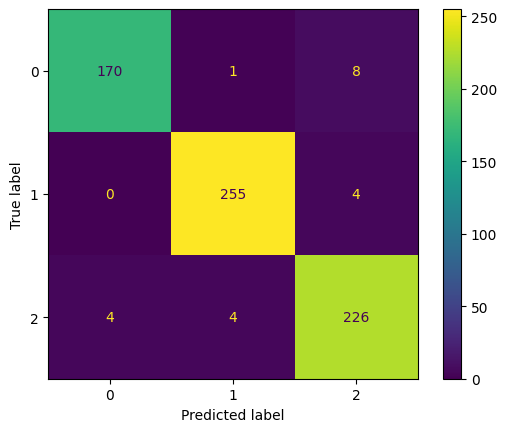

In [16]:
best_lr_model=logreg_cv.best_estimator_
y_pred_lr=best_lr_model.predict(X_test)
lr_test_score=accuracy_score(y_test,y_pred_lr)

print("Logistic Regression Test Accuracy: ",lr_test_score)
print(classification_report(y_test,y_pred_lr))

ConfusionMatrixDisplay.from_estimator(best_lr_model,X_test,y_test)

In [17]:
cat=CatBoostClassifier(verbose=0)

cat_params={
    'depth':[4,6,8],
    'learning_rate':[0.01,0.05,0.1],
    'iterations':[100,200,300]
}



In [22]:
cat_cv=GridSearchCV(cat,cat_params,cv=3,scoring='accuracy')


In [23]:
cat_cv.fit(X_train,y_train)


,estimator,CatBoostClassifier(verbose=0)
,param_grid,"{'depth': [4, 6, ...], 'iterations': [100, 200, ...], 'learning_rate': [0.01, 0.05, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False


In [24]:
print("Best CatBoost parameters: ",cat_cv.best_params_)
print("Best CatBoost CV Accuracy: ",cat_cv.best_score_)

Best CatBoost parameters:  {'depth': 4, 'iterations': 300, 'learning_rate': 0.1}
Best CatBoost CV Accuracy:  0.9700287417370559


CatBoost Test Accuracy:  0.9747023809523809
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       179
           1       1.00      0.97      0.98       259
           2       0.95      0.99      0.97       234

    accuracy                           0.97       672
   macro avg       0.98      0.97      0.97       672
weighted avg       0.98      0.97      0.97       672



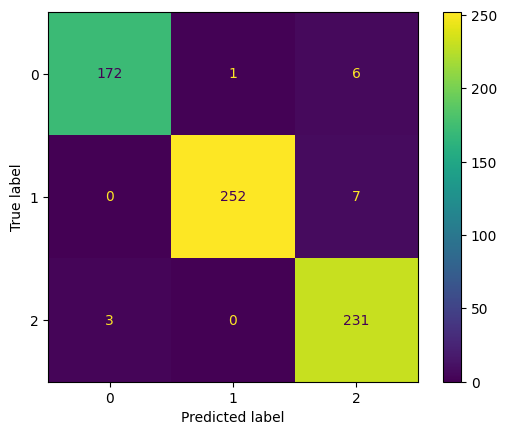

In [25]:
best_cat_model=cat_cv.best_estimator_

y_pred_cat=best_cat_model.predict(X_test)
cat_test_score=accuracy_score(y_test,y_pred_cat)

print("CatBoost Test Accuracy: ",cat_test_score)
print(classification_report(y_test,y_pred_cat))

ConfusionMatrixDisplay.from_estimator(best_cat_model,X_test,y_test)

In [26]:
comparison=pd.DataFrame({
    'Model':['Logistic Regression','CatBoost'],
    'CV Accuracy':[logreg_cv.best_score_,cat_cv.best_score_],
    'Test Accuracy':[lr_test_score,cat_test_score]
})

comparison

,Model,CV Accuracy,Test Accuracy
0,Logistic Regression,0.965558,0.968750
1,CatBoost,0.970029,0.974702


In [27]:
if cat_test_score>lr_test_score:
    final_model=best_cat_model
    print("Final Selected Model: CatBoost")
else:
    final_model=best_lr_model
    print("Final Selected Model: Logistic Regression")

Final Selected Model: CatBoost


In [29]:
best_cat_model=CatBoostClassifier(
    depth=4,
    iterations=300,
    learning_rate=0.1,
    verbose=0
)

In [30]:
best_model=best_cat_model.fit(X_train,y_train)
y_pred=best_model.predict(X_test)
score=accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)

print("CatBoost Classifier")
print("Accuracy Score value: {:.4f}".format(score))
print(cr)

CatBoost Classifier
Accuracy Score value: 0.9747
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       179
           1       1.00      0.97      0.98       259
           2       0.95      0.99      0.97       234

    accuracy                           0.97       672
   macro avg       0.98      0.97      0.97       672
weighted avg       0.98      0.97      0.97       672



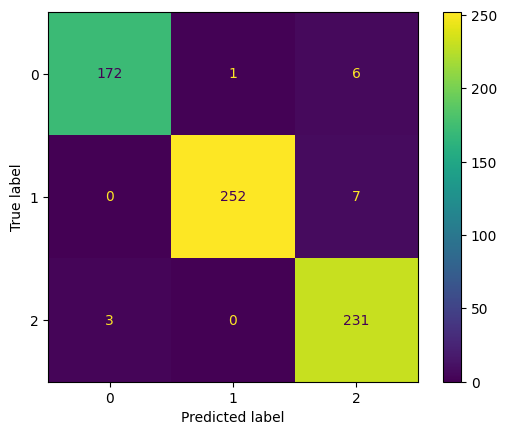

In [31]:
ConfusionMatrixDisplay.from_estimator(best_model,X_test,y_test)

In [32]:

feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": final_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance

,Feature,Importance
6,Total_Spending,35.416389
4,Children,8.331438
11,Meat,6.804976
3,Parental Status,6.681689
18,Discount Purchases,5.267219
10,Fruits,4.766891
12,Fish,3.868118
5,Income,3.726112
13,Sweets,3.380883
20,NumWebVisitsMonth,3.311364


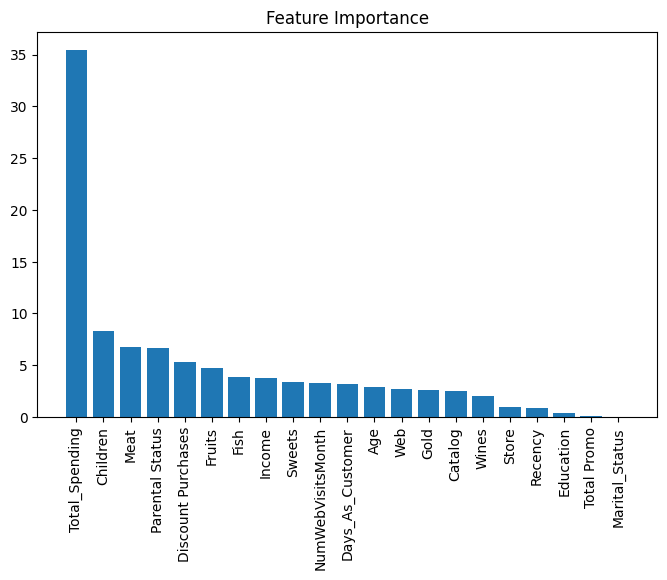

In [34]:
plt.figure(figsize=(8,5))
plt.bar(feature_importance["Feature"], feature_importance["Importance"])
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.show()

In [36]:
import joblib
joblib.dump(best_model,"catboost_model.pkl")

['catboost_model.pkl']

In [37]:
joblib.dump(best_model,"catboost_updated.pkl")

['catboost_updated.pkl']